In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from plot_region import *

In [2]:
cancer = datasets.load_breast_cancer()#больше образцов, более зашумленная
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X.shape

(569, 30)

In [3]:
param_range = [0.00001, 0.0005, 0.001, 0.01, 0.1, 1, 10, 100, 500, 
               1000, 5000, 10000, 15000, 20000, 30000]

In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

In [5]:
scaler = StandardScaler()
Xsc = scaler.fit_transform(X)
train_scores, test_scores = validation_curve(
    LogisticRegression(multi_class='multinomial',solver='lbfgs', max_iter=1000), Xsc, y, 
    param_name="C", param_range=param_range, scoring="accuracy", n_jobs=-1, cv=3)

In [12]:
lr = LogisticRegression(multi_class='multinomial',solver='lbfgs', max_iter=1000, verbose=1)
lr.fit(Xsc, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=1, warm_start=False)

In [6]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

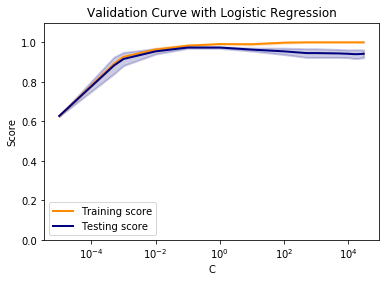

In [8]:
plt.title("Validation Curve with Logistic Regression")
plt.xlabel("С")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Testing score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="lower left")
plt.show()